In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples

In [2]:
labels = ['r', 'A_\\mathrm{dust}','\\alpha_\\mathrm{dust}', '\\beta_\\mathrm{dust}']
names = ['r','Adust','adust','bdust']

In [3]:
dof='__gm_dof'
mc_file = f"workspace/comp_sep/cmb_r0p00__dust_prior_beta_alpha__noise{dof}/data/mcmc_trial.hdf5"
old_mc_file = f"workspace/2019_mcmc.hdf5"

In [4]:
mc_dat = h5py.File(mc_file,'r')
mc_old_dat = h5py.File(old_mc_file,'r')

In [5]:
chain = mc_dat['chain']
chain_2 = mc_old_dat['chain']
sel = np.where(chain[:,0]>0)
cut_chain=[chain[:,0][sel],chain[:,1][sel],chain[:,2][sel],chain[:,3][sel]]

In [6]:
samples = MCSamples(samples=cut_chain,names = names, labels = labels,ranges={'r':(0,None)})
samples2 = MCSamples(samples=chain_2,names = names, labels = labels,ranges={'r':(0,None)})

Removed no burn in
Removed no burn in


In [7]:
titles = [samples.getInlineLatex(title,limit=2) for title in names]
titles = [f"${title}$" for title in titles]

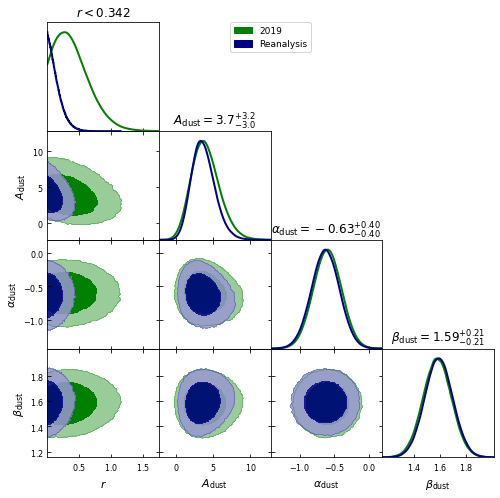

In [8]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples2,samples], 
                filled=True, 
                title_limit=2,
                legend_labels=['2019','Reanalysis'],
                contour_colors=['green','darkblue'],
                line_args=[{'lw':2,'color':'green'},
                           {'lw':2,'color':'darkblue'}])
axs = plt.gcf().get_axes()
for t, ax in zip(titles, [axs[i] for i in [3, 6, 8, 9]]):
    ax.set_title(t, fontsize=12)
plt.savefig('plots/corner.png',bbox_inches='tight')